In [1]:
import pandas as pd
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split, KFold, GridSearchCV, StratifiedKFold, cross_val_score, cross_val_predict
from sklearn.svm import LinearSVC, SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix, classification_report, precision_score, accuracy_score, recall_score, f1_score
import matplotlib.pyplot as plt
import pickle
import time
import seaborn as sns
%matplotlib inline

In [2]:
Individuos = pd.read_csv(r'/content/BDIndividuosTotal.csv',decimal=',')
Organizaciones = pd.read_csv(r'/content/BDOrganizacionesTotal.csv',decimal=',')
Individuos

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (2,3,4,82,105,106,107,108,109,110,111,112,119,120,121,134,169) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Edicion,S_1,S_2,I_92,I_93,I_6,I_7,I_8,I_9,I_10,I_11,I_13,I_14,I_15,I_16,I_19,I_20,I_21_1,I_21_2,I_21_3,I_22,I_23,I_24,I_26_1,I_26_2,I_26_3,I_27,I_29,I_33,I_34_1,I_34_2,I_34_3,I_34_4,I_40_1,I_40_2,I_40_3,I_40_4,I_40_5,I_32,I_46_1,...,I_18_1,I_18_2,I_18_3,I_18_4,I_18_5,I_18_6,I_18_7,I_18_8,I_18_9,I_18_10,I_18_11,I_18_12,I_18_13,I_90_1,I_90_2,I_90_3,I_90_4,I_90_5,I_90_6,I_90_7,I_90_8,I_90_9,I_90_10,I_91_1,I_91_2,I_91_3,I_91_4,I_91_5,I_91_6,I_91_7,I_91_8,I_91_9,I_91_10,CodZona,Zona,Condiciones Territoriales,Prácticas,Efectos,IPCM,I_18_14
0,2019,1,La 1001011\tLA AVANZADA,1\tPOPULAR,NaN,Femenino,1985.0,Sin pertenencia étnica,Desplazados o víctima del Conflicto Armado,Básica Secundaria,Empleado,No,"Derechos humanos, convivencia y ciudadanía",No,No,Si,La Junta de Acción Comunal,No,No,No,No,No,Adecuadas,No,Si,No,No,No,Mejoras para la ciudad y el país,"Ni de acuerdo, ni en desacuerdo",De acuerdo,De acuerdo,De acuerdo,4,5,1,1,5,Incompleta o Confusa,No lo conozco,...,Si,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Si,No,No,Si,No,Si,No,No,No,No,Si,No,No,Si,No,No,No,No,1.0,Nororiental,0.361795,0.387014,0.444633,0.40,NaN
1,2019,1,NaN,1\tPOPULAR,NaN,Masculino,1953.0,Sin pertenencia étnica,Ninguno,Básica Primaria,Empleado,Si,Jóvenes,No,No,No,NaN,No,Si,No,Si,Si,Regulares,Si,Si,No,Si,No,Beneficios para el barrio y la comuna,Totalmente de acuerdo,Totalmente de acuerdo,Totalmente de acuerdo,En desacuerdo,1,1,1,1,5,Suficiente y Clara,"Lo conozco, pero no lo he usado",...,Si,No,No,No,No,No,No,No,No,No,No,No,No,Si,Si,Si,No,No,Si,Si,Si,Si,Si,No,Si,Si,No,No,No,Si,No,No,Si,1.0,Nororiental,0.327151,0.461779,0.238168,0.33,NaN
2,2019,1,Chispero,NaN,NaN,Femenino,1970.0,Sin pertenencia étnica,Desplazados o víctima del Conflicto Armado,Ninguno,Oficios del hogar,No,Otro,No,No,No,NaN,No,No,No,No,No,Inadecuadas,Si,No,No,No,No,Mejoras para la ciudad y el país,De acuerdo,De acuerdo,De acuerdo,De acuerdo,1,4,1,1,4,No recibió,No lo conozco,...,Si,No,No,No,No,No,No,No,No,No,No,No,No,No,Si,Si,No,Si,No,No,Si,No,No,No,No,Si,No,Si,No,No,Si,No,No,1.0,Nororiental,0.299800,0.372017,0.673632,0.42,NaN
3,2019,1,Ca,1\tPOPULAR,NaN,Femenino,1989.0,Sin pertenencia étnica,Desplazados o víctima del Conflicto Armado,Básica Secundaria,Buscando trabajo,No,"Derechos humanos, convivencia y ciudadanía",No,No,Si,La alcaldía,No,No,No,No,No,Regulares,No,No,No,No,No,Mejoras para la ciudad y el país,De acuerdo,De acuerdo,De acuerdo,"Ni de acuerdo, ni en desacuerdo",3,3,4,4,4,Suficiente y Clara,"Lo conozco, pero no lo he usado",...,No,No,No,No,No,No,No,No,No,No,No,No,Si,Si,No,Si,Si,Si,Si,No,Si,No,No,No,No,No,No,No,Si,No,Si,No,No,1.0,Nororiental,0.558784,0.633542,0.323003,0.49,NaN
4,2019,1,1001001\tSANTO DOMINGO SABIO Nº,1\tPOPULAR,NaN,Femenino,1953.0,Mestizo,Ninguno,Ninguno,Voluntariado en actividades sociales o políticas,No,Adulto mayor,No,No,Si,La alcaldía,No,No,No,No,No,Adecuadas,No,No,No,No,No,Mejoras a nivel individual y familiar,De acuerdo,Totalmente de acuerdo,De acuerdo,De acuerdo,2,1,1,1,3,Suficiente y Clara,No lo conozco,...,No,No,No,Si,No,No,No,No,No,No,No,No,No,No,No,Si,No,No,Si,No,Si,No,No,No,No,No,No,No,Si,No,Si,No,No,1.0,Nororiental,0.250183,0.521447,0.238168,0.31,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7093,2017,8,1008017,NaN,NaN,Femenino,1992.0,Sin pertenencia étnica,Ninguno,Básica Secundaria,Oficios del hogar,Si,mujeres,No,No,No,Otro,No,Si,No,No,Otro,Inadecuadas,No responde,No responde,No responde,Si,No,Mejoras a nivel individual y familiar,"Ni de acuerdo, ni en desacuerdo","Ni de acuerdo, ni en desacuerdo","Ni de acuerdo, ni en desacuerdo","Ni de acuerdo, ni en desacuerdo",1,1,1,1,5,Suficiente y Clara,No lo conozco,...,No,No,No,No,No,No,No,No,No,Si,No,No,No,No,No,Si,No,Si,Si,No,Si,Si,Si,No,N

In [ ]:
# I_2019 = Individuos[Individuos['Edicion'] == 2019]
# I_2017 = Individuos[Individuos['Edicion'] == 2017]

In [3]:
Individuos = Individuos[['S_1', 'I_6', 'I_7', 'I_8', 'I_9', 'I_10',
          "I_19",	"I_21_1",	"I_21_2",	"I_21_3", "I_22",	"I_23",	"I_24",	"I_26_1",	"I_26_2","I_26_3", "I_27",	"I_28_1", "I_29",
          "I_32",	"I_33",	"I_40_1", "I_40_2", "I_40_3", "I_40_4", "I_40_5",	"I_90_1", "I_90_2","I_90_3","I_90_4","I_90_5","I_90_6","I_90_7",
          "I_90_8","I_90_9","I_90_10",
          "I_31",	"I_35_1", "I_38",	"I_51_2", "I_51_3",	"I_51_4",	"I_52",	"I_54", "I_55",	"I_48_1", "I_48_2", "I_48_3", "I_48_4", "I_48_5",
          "I_48_6","I_48_7","I_48_8","I_48_9", "I_91_1","I_91_2","I_91_3","I_91_4","I_91_5","I_91_6","I_91_7","I_91_8","I_91_9","I_91_10",
          "I_30",	"I_41",	"I_44",	"I_45","I_47",
          'IPCM']]
Individuos['I_7'] = Individuos['I_7'].replace(np.nan, 9999, regex=True)
Individuos['I_8'] = Individuos['I_8'].replace(np.nan, 'Sin registro', regex=True)
Individuos['I_24'] = Individuos['I_24'].replace(-88, 'Sin registro', regex=True)
Individuos['I_35_1'] = Individuos['I_35_1'].replace(np.nan, 'Sin registro', regex=True)
Individuos['I_47'] = Individuos['I_47'].replace(np.nan, 'Sin registro', regex=True)
Individuos = Individuos.dropna()
# Individuos.to_excel('IndividuosIPCM.xlsx', index=False)
Individuos

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

,S_1,I_6,I_7,I_8,I_9,I_10,I_19,I_21_1,I_21_2,I_21_3,I_22,I_23,I_24,I_26_1,I_26_2,I_26_3,I_27,I_28_1,I_29,I_32,I_33,I_40_1,I_40_2,I_40_3,I_40_4,I_40_5,I_90_1,I_90_2,I_90_3,I_90_4,I_90_5,I_90_6,I_90_7,I_90_8,I_90_9,I_90_10,I_31,I_35_1,I_38,I_51_2,I_51_3,I_51_4,I_52,I_54,I_55,I_48_1,I_48_2,I_48_3,I_48_4,I_48_5,I_48_6,I_48_7,I_48_8,I_48_9,I_91_1,I_91_2,I_91_3,I_91_4,I_91_5,I_91_6,I_91_7,I_91_8,I_91_9,I_91_10,I_30,I_41,I_44,I_45,I_47,IPCM
0,1,Femenino,1985.0,Sin pertenencia étnica,Desplazados o víctima del Conflicto Armado,Básica Secundaria,Si,No,No,No,No,No,Adecuadas,No,Si,No,No,No ha sido amenazado para participar,No,Incompleta o Confusa,Mejoras para la ciudad y el país,4,5,1,1,5,No,No,Si,No,No,Si,No,Si,No,No,Si,No se han presentado conflictos,Si,De acuerdo,Desacuerdo,Desacuerdo,Si,No,No,4,3,3,3,3,4,3,3,3,No,No,Si,No,No,Si,No,No,No,No,Si,No,Si,Si,Mejorado,0.40
1,1,Masculino,1953.0,Sin pertenencia étnica,Ninguno,Básica Primaria,No,No,Si,No,Si,Si,Regulares,Si,Si,No,Si,No ha sido amenazado para participar,No,Suficiente y Clara,Beneficios para el barrio y la comuna,1,1,1,1,5,Si,Si,Si,No,No,Si,Si,Si,Si,Si,Si,No se han presentado conflictos,No,Totalmente desacuerdo,Totalmente desacuerdo,Totalmente desacuerdo,Si,Si,Si,3,3,3,4,5,4,3,1,5,No,Si,Si,No,No,No,Si,No,No,Si,Si,Si,Si,No,Mejorado,0.33
2,1,Femenino,1970.0,Sin pertenencia étnica,Desplazados o víctima del Conflicto Armado,Ninguno,No,No,No,No,No,No,Inadecuadas,Si,No,No,No,No ha sido amenazado para participar,No,No recibió,Mejoras para la ciudad y el país,1,4,1,1,4,No,Si,Si,No,Si,No,No,Si,No,No,No,No pertenezco a ninguna organización,No,Desacuerdo,De acuerdo,Desacuerdo,Si,No,No,3,3,3,3,3,3,3,3,3,No,No,Si,No,Si,No,No,Si,No,No,Si,No,No,No,Empeorado,0.42
3,1,Femenino,1989.0,Sin pertenencia étnica,Desplazados o víctima del Conflicto Armado,Básica Secundaria,Si,No,No,No,No,No,Regulares,No,No,No,No,No ha sido amenazado para participar,No,Suficiente y Clara,Mejoras para la ciudad y el país,3,3,4,4,4,Si,No,Si,Si,Si,Si,No,Si,No,No,Si,No se han presentado conflictos,No,"Ni de acuerdo, ni en desacuerdo","Ni de acuerdo, ni en desacuerdo","Ni de acuerdo, ni en desacuerdo",No,Si,Si,3,3,3,3,3,3,3,3,3,No,No,No,No,No,Si,No,Si,No,No,Si,No,Si,No,Mejorado,0.49
4,1,Femenino,1953.0,Mestizo,Ninguno,Ninguno,Si,No,No,No,No,No,Adecuadas,No,No,No,No,No ha sido amenazado para participar,No,Suficiente y Clara,Mejoras a nivel individual y familiar,2,1,1,1,3,No,No,Si,No,No,Si,No,Si,No,No,No,No se han presentado conflictos,Si,De acuerdo,De acuerdo,De acuerdo,Si,No,No,3,1,1,1,1,1,1,1,1,No,No,No,No,No,Si,No,Si,No,No,No,No,Si,No,Permanecido iguales,0.31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7093,8,Femenino,1992.0,Sin pertenencia étnica,Ninguno,Básica Secundaria,No,No,Si,No,No,Otro,Inadecuadas,No responde,No responde,No responde,Si,No ha sido amenazado para participar,No,Suficiente y Clara,Mejoras a nivel individual y familiar,1,1,1,1,5,No,No,Si,No,Si,Si,No,Si,Si,Si,Si,No se han presentado conflictos,No,De acuerdo,De acuerdo,De acuerdo,Si,Si,No,4,5,1,4,4,4,4,5,5,No,No,No,No,No,No,No,No,No,No,Si,No,No,No,Sin registro,0.37
7094,8,Femenino,1993.0,Sin pertenencia étnica,Ninguno,Básica Primaria,No,No,Si,No,No,Otro,Inadecuadas,No responde,No responde,No responde,Si,No ha sido amenazado para participar,No,Suficiente y Clara,Mejoras a nivel individual y familiar,1,1,1,1,5,No,No,No,No,No,No,No,No,No,No,Si,No se han presentado conflictos,No,"Ni de acuerdo, ni en desacuerdo",De acuerdo,En desacuerdo,Si,Si,No,3,3,1,2,4,4,4,4,4,No,No,No,No,No,No,No,No,No,No,Si,No,No,No,Sin registro,0.37
7095,8,Femenino,1985.0,Sin pertenencia étnica,Desplazado,Básica Primaria,Si,No,Si,No,No,Otro,Inadecuadas,No responde,No responde,No responde,Si,No ha sido amenazado para participar,No,Suficiente y Clara,Benefi

In [4]:
Clase = []
for x in Individuos['IPCM']:
  if x >= 0.7:
    Clase.append(2)
  elif x >= 0.3:
    Clase.append(1)
  elif x >= 0:
    Clase.append(0)
  else:
    None

In [5]:
Individuos.insert(70, "Clase", Clase, allow_duplicates=False)

In [6]:
print(Individuos.groupby('Clase').size())

Clase
0    1907
1    5093
2       4
dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


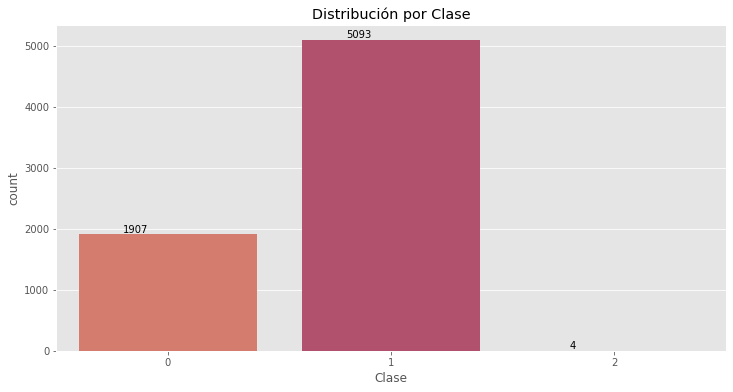

In [7]:
plt.style.use('ggplot')
Frecuencia = Individuos.groupby('Clase').sum()
plt.figure(figsize=(12,6))
graf = sns.countplot(Individuos['Clase'],palette='flare')
plt.title('Distribución por Clase')
for p in graf.patches:
    graf.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='left', va='bottom', color='black', size=10)
plt.show()

In [8]:
X = np.array(Individuos.drop(['Clase','IPCM'],1))
Y = np.array(Individuos['Clase'])
feature_names = Individuos.drop(['Clase','IPCM'],1)
feature_names = feature_names.columns
feature_names = np.array(feature_names)
feature_names
# X = Individuos.drop(['Clase','IPCM'],1)
# Y = Individuos['Clase']

array(['S_1', 'I_6', 'I_7', 'I_8', 'I_9', 'I_10', 'I_19', 'I_21_1',
       'I_21_2', 'I_21_3', 'I_22', 'I_23', 'I_24', 'I_26_1', 'I_26_2',
       'I_26_3', 'I_27', 'I_28_1', 'I_29', 'I_32', 'I_33', 'I_40_1',
       'I_40_2', 'I_40_3', 'I_40_4', 'I_40_5', 'I_90_1', 'I_90_2',
       'I_90_3', 'I_90_4', 'I_90_5', 'I_90_6', 'I_90_7', 'I_90_8',
       'I_90_9', 'I_90_10', 'I_31', 'I_35_1', 'I_38', 'I_51_2', 'I_51_3',
       'I_51_4', 'I_52', 'I_54', 'I_55', 'I_48_1', 'I_48_2', 'I_48_3',
       'I_48_4', 'I_48_5', 'I_48_6', 'I_48_7', 'I_48_8', 'I_48_9',
       'I_91_1', 'I_91_2', 'I_91_3', 'I_91_4', 'I_91_5', 'I_91_6',
       'I_91_7', 'I_91_8', 'I_91_9', 'I_91_10', 'I_30', 'I_41', 'I_44',
       'I_45', 'I_47'], dtype=object)

In [9]:
ordinalEncoder = OrdinalEncoder(categories="auto", dtype=np.float64)

ordinalEncoder.fit(X)

X = ordinalEncoder.transform(X)
X

array([[ 0.,  0., 60., ...,  1.,  1.,  1.],
       [ 0.,  1., 28., ...,  1.,  0.,  1.],
       [ 0.,  0., 45., ...,  0.,  0.,  0.],
       ...,
       [ 7.,  0., 60., ...,  0.,  0.,  2.],
       [ 7.,  0., 60., ...,  0.,  0.,  0.],
       [ 7.,  0., 65., ...,  0.,  0.,  0.]])

In [10]:
X = pd.DataFrame(X, columns=feature_names)

In [11]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.3,random_state=0)

In [12]:
escalar = StandardScaler(with_mean=False)
X_train = escalar.fit_transform(X_train)
X_test = escalar.transform(X_test)

In [13]:
skf = StratifiedKFold(n_splits=5, shuffle=True)

In [14]:
params = {
    'penalty':['l1', 'l2', 'elasticnet'],        # l1 is Lasso, l2 is Ridge
    'solver':['liblinear'],
    'C': np.linspace(0.00002,1,100)
}

lr = LogisticRegression(class_weight='balanced')
lr_gs = GridSearchCV(lr, params, cv=skf, verbose=1).fit(X_train,y_train)

Fitting 5 folds for each of 300 candidates, totalling 1500 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
500 fits failed out of a total of 1500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
500 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solve

In [15]:
print("Mejores parámetros", lr_gs.best_params_)
print("Mejor estimador", lr_gs.best_estimator_)

Mejores parámetros {'C': 0.03032242424242424, 'penalty': 'l1', 'solver': 'liblinear'}
Mejor estimador LogisticRegression(C=0.03032242424242424, class_weight='balanced', penalty='l1',
                   solver='liblinear')


In [16]:
lr = LogisticRegression(C= 0.03032242424242424, penalty= 'l1', solver= 'liblinear', class_weight='balanced')
# scores = cross_val_predict(lr, X_test, y_test, cv=skf)
# scores

lr.fit(X_train,y_train)
init_lr = time.time()
time_lr = time.time()-init_lr
lr_y_pred = lr.predict(X_test)
lr_y_pred

array([1, 1, 0, ..., 0, 1, 1])

In [17]:
matriz_lr = confusion_matrix(y_test, lr_y_pred)
print('Matriz de Confusión:')
print(matriz_lr)

Matriz de Confusión:
[[ 352  244    1]
 [ 213 1285    5]
 [   0    2    0]]


Text(0.5, 15.0, 'Predicción')

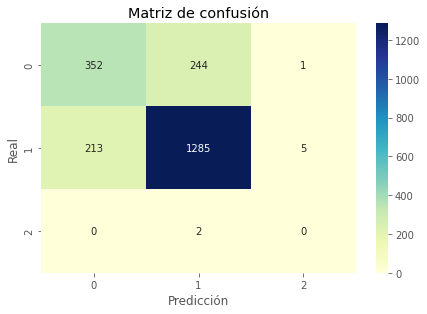

In [18]:
sns.heatmap(pd.DataFrame(matriz_lr), annot=True, cmap="YlGnBu" ,fmt='g')
plt.tight_layout()
plt.title('Matriz de confusión', y=1.1)
plt.ylabel('Real')
plt.xlabel('Predicción')

In [19]:
precision_lr = precision_score(y_test, lr_y_pred,average='micro')
print('Precisión del modelo:')
print(precision_lr)
 
accuracy_lr = accuracy_score(y_test, lr_y_pred)
print('Exactitud del modelo:')
print(accuracy_lr)
 
recall_lr = recall_score(y_test, lr_y_pred, average='micro')
print('Exhaustividad del modelo:')
print(recall_lr)

f1_lr = f1_score(y_test, lr_y_pred, average='micro')
print('Valor F1 del modelo:')
print(f1_lr)

Precisión del modelo:
0.7787821122740247
Exactitud del modelo:
0.7787821122740247
Exhaustividad del modelo:
0.7787821122740247
Valor F1 del modelo:
0.7787821122740247


In [20]:
clas_lr = classification_report(y_test, lr_y_pred, zero_division = 1)
print(clas_lr)

              precision    recall  f1-score   support

           0       0.62      0.59      0.61       597
           1       0.84      0.85      0.85      1503
           2       0.00      0.00      0.00         2

    accuracy                           0.78      2102
   macro avg       0.49      0.48      0.48      2102
weighted avg       0.78      0.78      0.78      2102



In [21]:
rfc = RandomForestClassifier(class_weight='balanced')

param_grid = {
    'n_estimators': [100, 200, 700],
    'max_features': ['auto', 'sqrt', 'log2']
}

gs_rfc = GridSearchCV(rfc, param_grid, cv=skf, verbose=1).fit(X_train,y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  UserWarning,


In [22]:
print("Mejores parámetros", gs_rfc.best_params_)
print("Mejor estimador", gs_rfc.best_estimator_)

Mejores parámetros {'max_features': 'sqrt', 'n_estimators': 100}
Mejor estimador RandomForestClassifier(class_weight='balanced', max_features='sqrt')


In [23]:
rfc = RandomForestClassifier(max_features= 'sqrt', n_estimators= 100, class_weight='balanced')

init_rf = time.time()
rfc.fit(X_train,y_train)
time_rf = time.time()-init_rf
rfc_y_pred = rfc.predict(X_test)
rfc_y_pred

array([1, 1, 1, ..., 0, 1, 1])

In [24]:
matriz_rfc = confusion_matrix(y_test, rfc_y_pred)
print('Matriz de Confusión:')
print(matriz_rfc)

Matriz de Confusión:
[[ 266  331    0]
 [  24 1479    0]
 [   0    2    0]]


Text(0.5, 15.0, 'Predicción')

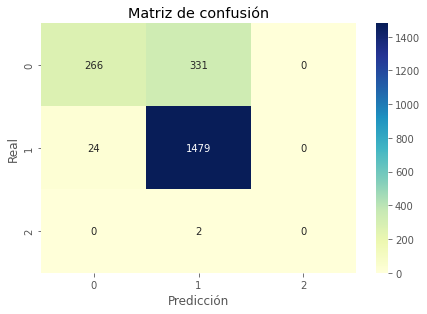

In [25]:
sns.heatmap(pd.DataFrame(matriz_rfc), annot=True, cmap="YlGnBu" ,fmt='g')
plt.tight_layout()
plt.title('Matriz de confusión', y=1.1)
plt.ylabel('Real')
plt.xlabel('Predicción')

In [26]:
precision_rfc = precision_score(y_test, rfc_y_pred,average='micro')
print('Precisión del modelo:')
print(precision_rfc)

accuracy_rfc = accuracy_score(y_test, rfc_y_pred)
print('Exactitud del modelo:')
print(accuracy_rfc)

recall_rfc = recall_score(y_test, rfc_y_pred, average='micro')
print('Exhaustividad del modelo:')
print(recall_rfc)

f1_rfc = f1_score(y_test, rfc_y_pred, average='micro')
print('Valor F1 del modelo:')
print(f1_rfc)

Precisión del modelo:
0.8301617507136061
Exactitud del modelo:
0.8301617507136061
Exhaustividad del modelo:
0.8301617507136061
Valor F1 del modelo:
0.8301617507136061


In [27]:
clas_rfc = classification_report(y_test, rfc_y_pred, zero_division = 1)
print(clas_rfc)

              precision    recall  f1-score   support

           0       0.92      0.45      0.60       597
           1       0.82      0.98      0.89      1503
           2       1.00      0.00      0.00         2

    accuracy                           0.83      2102
   macro avg       0.91      0.48      0.50      2102
weighted avg       0.85      0.83      0.81      2102



In [28]:
svm = SVC(class_weight='balanced')
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}

gs_svm = GridSearchCV(svm, param_grid, cv=skf, verbose=1).fit(X_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  UserWarning,


In [29]:
print("Mejores parámetros", gs_svm.best_params_)
print("Mejor estimador", gs_svm.best_estimator_)

Mejores parámetros {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
Mejor estimador SVC(C=10, class_weight='balanced', gamma=0.1)


In [30]:
svm = SVC(C=10, class_weight='balanced', gamma=0.01)
init_svm= time.time()
svm.fit(X_train,y_train)
time_svm=time.time()-init_svm
svm_y_pred = svm.predict(X_test)
svm_y_pred

array([1, 1, 1, ..., 0, 1, 1])

In [31]:
matriz_svm = confusion_matrix(y_test, svm_y_pred)
print('Matriz de Confusión:')
print(matriz_svm)

Matriz de Confusión:
[[ 360  237    0]
 [ 217 1286    0]
 [   0    2    0]]


Text(0.5, 15.0, 'Predicción')

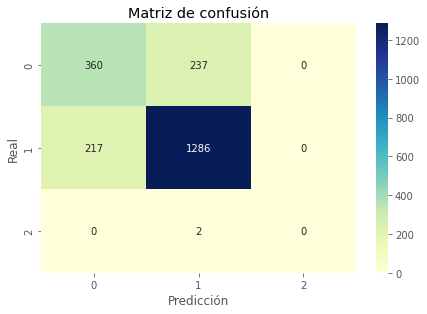

In [32]:
sns.heatmap(pd.DataFrame(matriz_svm), annot=True, cmap="YlGnBu" ,fmt='g')
plt.tight_layout()
plt.title('Matriz de confusión', y=1.1)
plt.ylabel('Real')
plt.xlabel('Predicción')

In [33]:
precision_svm = precision_score(y_test, svm_y_pred,average='micro')
print('Precisión del modelo:')
print(precision_svm)

accuracy_svm = accuracy_score(y_test, svm_y_pred)
print('Exactitud del modelo:')
print(accuracy_svm)

recall_svm = recall_score(y_test, svm_y_pred, average='micro')
print('Exhaustividad del modelo:')
print(recall_svm)

f1_svm = f1_score(y_test, svm_y_pred, average='micro')
print('Valor F1 del modelo:')
print(f1_svm)

Precisión del modelo:
0.7830637488106565
Exactitud del modelo:
0.7830637488106565
Exhaustividad del modelo:
0.7830637488106565
Valor F1 del modelo:
0.7830637488106567


In [34]:
clas_svm = classification_report(y_test, svm_y_pred, zero_division = 1)
print(clas_svm)

              precision    recall  f1-score   support

           0       0.62      0.60      0.61       597
           1       0.84      0.86      0.85      1503
           2       1.00      0.00      0.00         2

    accuracy                           0.78      2102
   macro avg       0.82      0.49      0.49      2102
weighted avg       0.78      0.78      0.78      2102



In [35]:
knn = KNeighborsClassifier()
param_grid = {
    'n_neighbors': (3, 5, 10),
    'leaf_size': (20,40,1),
    'p': (1,2),
    'weights': ('uniform', 'distance'),
    'metric': ('minkowski', 'chebyshev', 'euclidean', 'manhattan')
    }
gs_knn = GridSearchCV(knn, param_grid, cv=skf, verbose=1).fit(X_train,y_train)

Fitting 5 folds for each of 144 candidates, totalling 720 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  UserWarning,


In [36]:
print("Mejores parámetros", gs_knn.best_params_)
print("Mejor estimador", gs_knn.best_estimator_)

Mejores parámetros {'leaf_size': 20, 'metric': 'minkowski', 'n_neighbors': 10, 'p': 1, 'weights': 'distance'}
Mejor estimador KNeighborsClassifier(leaf_size=20, n_neighbors=10, p=1, weights='distance')


In [37]:
knn = KNeighborsClassifier(leaf_size=20, n_neighbors=10, p=1, weights='distance', metric='minkowski')

init_knn= time.time()
knn.fit(X_train,y_train)
time_knn=time.time()-init_knn
knn_y_pred = knn.predict(X_test)
knn_y_pred

array([1, 1, 0, ..., 0, 1, 1])

In [38]:
matriz_knn = confusion_matrix(y_test, knn_y_pred)
print('Matriz de Confusión:')
print(matriz_knn)

Matriz de Confusión:
[[ 322  275    0]
 [ 141 1362    0]
 [   0    2    0]]


Text(0.5, 15.0, 'Predicción')

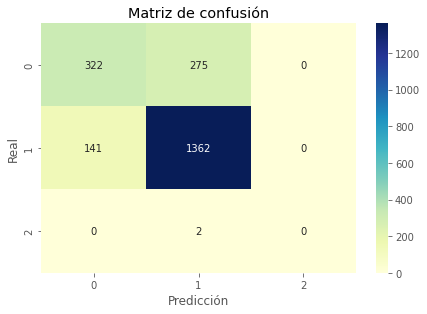

In [39]:
sns.heatmap(pd.DataFrame(matriz_knn), annot=True, cmap="YlGnBu" ,fmt='g')
plt.tight_layout()
plt.title('Matriz de confusión', y=1.1)
plt.ylabel('Real')
plt.xlabel('Predicción')

In [40]:
precision_knn = precision_score(y_test, knn_y_pred,average='micro')
print('Precisión del modelo:')
print(precision_knn)

accuracy_knn = accuracy_score(y_test, knn_y_pred)
print('Exactitud del modelo:')
print(accuracy_knn)

recall_knn = recall_score(y_test, knn_y_pred, average='micro')
print('Exhaustividad del modelo:')
print(recall_knn)

f1_knn = f1_score(y_test, knn_y_pred, average='micro')
print('Valor F1 del modelo:')
print(f1_knn)

Precisión del modelo:
0.8011417697431018
Exactitud del modelo:
0.8011417697431018
Exhaustividad del modelo:
0.8011417697431018
Valor F1 del modelo:
0.8011417697431018


In [41]:
clas_knn = classification_report(y_test, knn_y_pred, zero_division = 1)
print(clas_knn)

              precision    recall  f1-score   support

           0       0.70      0.54      0.61       597
           1       0.83      0.91      0.87      1503
           2       1.00      0.00      0.00         2

    accuracy                           0.80      2102
   macro avg       0.84      0.48      0.49      2102
weighted avg       0.79      0.80      0.79      2102



In [42]:
#tiempo de entrenamiento Regresión logística
print("tiempo de entrenamiento Regresión logística : ", time_lr/60)
#tiempo de entrenamiento Random Forest
print("tiempo de entrenamiento Random Forest:" , time_rf/60)
#tiempo de entrenamiento SVM
print("tiempo de entrenaiento SVM :",time_svm/60)
#tiempo de entrenamiento KNN
print("tiempo de entrenamiento KNN : ", time_knn/60)

tiempo de entrenamiento Regresión logística :  5.364418029785156e-07
tiempo de entrenamiento Random Forest: 0.012309670448303223
tiempo de entrenaiento SVM : 0.03413560390472412
tiempo de entrenamiento KNN :  6.29583994547526e-05
